# Lab: Basics of Returns
## Formulae for return
$$R_{t,t+1} = \frac{P_{t+1} - P_t}{P_t}$$
or
$$R_{t,t+1} = \frac{P_{t+1}}{P_t} - 1$$

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

## Computing returns with numpy

In [2]:
prices_arr = np.array([8.70, 8.91, 8.71])
prices_arr

array([8.7 , 8.91, 8.71])

In [3]:
prices_arr[1:] / prices_arr[:-1] - 1

array([ 0.02413793, -0.02244669])

## Computing returns with pandas

In [4]:
prices_1 = pd.DataFrame(
    data={
        "BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
        "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11],
    }
)
prices_1

BLUE  ORANGE
0  8.70   10.66
1  8.91   11.08
2  8.71   10.71
3  8.43   11.59
4  8.73   12.11

In [5]:
# Method 1
prices_1.iloc[1:].values / prices_1.iloc[:-1] - 1

BLUE    ORANGE
0  0.024138  0.039400
1 -0.022447 -0.033394
2 -0.032147  0.082166
3  0.035587  0.044866

In [6]:
# Method 2
prices_1 / prices_1.shift(1) - 1

BLUE    ORANGE
0       NaN       NaN
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866

In [7]:
# Method 3
prices_1.pct_change()

BLUE    ORANGE
0       NaN       NaN
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866

## Example from the lecture

In [8]:
prices_2 = pd.read_csv("../data/sample_prices.csv")
prices_2

BLUE   ORANGE
0   8.7000  10.6600
1   8.9055  11.0828
2   8.7113  10.7100
3   8.4346  11.5907
4   8.7254  12.1070
5   9.0551  11.7876
6   8.9514  11.2078
7   9.2439  12.5192
8   9.1276  13.3624
9   9.3976  14.4080
10  9.4554  11.9837
11  9.5704  12.2718
12  9.7728  11.5892

<AxesSubplot: >

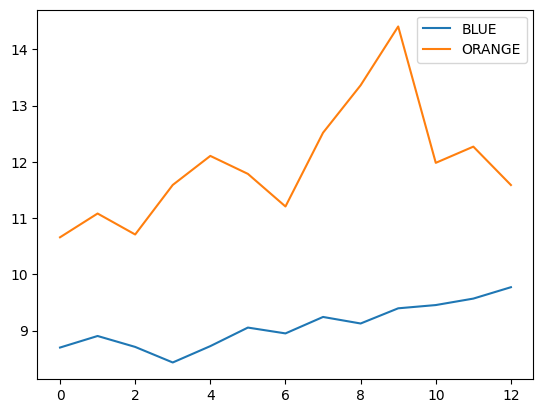

In [9]:
prices_2.plot()

In [10]:
returns = prices_2.pct_change()
returns

BLUE    ORANGE
0        NaN       NaN
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623

<AxesSubplot: >

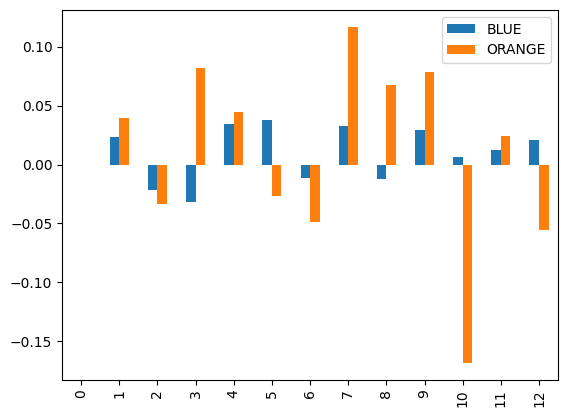

In [11]:
returns.plot.bar()

In [12]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [13]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [14]:
# Compound return
(returns + 1).prod() - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

## Annualization

In [15]:
monthly_return = 0.01
annualized_return = (1 + monthly_return) ** 12 - 1
annualized_return

0.12682503013196977